In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import chi2

In [71]:
# Matplotlib customize
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.borderpad'] = 0.6
plt.rcParams['legend.framealpha'] = 0.7

In [72]:
Channels = np.array([[0,5,1]],dtype=float)
Channels

array([[0., 5., 1.]])

In [73]:
def GetCL(n,b,s,mu):
    
    df = 2*(n+1)

    CLsb = 1 - chi2.cdf(2*(mu*s+b),df=df)
    CLb = 1 - chi2.cdf(2*b, df=df)

    return CLsb/CLb

In [74]:
mu = np.linspace(0.,4.,21)
mu

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

In [75]:
n = Channels[:,0]
b = Channels[:,1]
s = Channels[:,2]
Cls = GetCL(n[0],b[0],s[0],mu)

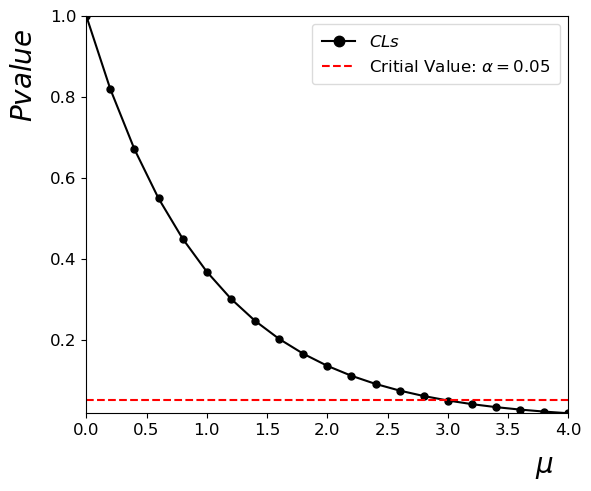

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(mu,Cls,color='k',marker='o',label=r'$CLs$')
alpha = 0.05
ax.axhline( y = alpha, color='r',ls = '--', label=r'Critial Value: $\alpha= %.2f$'%(alpha) )

# Label X
ax.set_xlabel(r'$\mu$')
ax.xaxis.set_label_coords(0.95,-0.1)
ax.set_xlim(mu[0],mu[-1])

# Label Y
ax.set_ylabel(r'$Pvalue$')
ax.yaxis.set_label_coords(-0.1,0.85)
ax.set_ylim(np.min(Cls),np.max(Cls))
    
        
# Ajustar los márgenes automáticamente
plt.tight_layout()

#Legend
ax.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,title='')

#
plt.savefig('ModifiedPValueScan.pdf')